<a href="https://colab.research.google.com/github/KaulanSerzhanuly/Homework1.3/blob/main/Copy_of_Amazon_review_collector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Install pandas (only need to run once)
!pip install pandas

In [41]:
import pandas as pd
import zipfile
import os

# Define the file paths
zip_path = '/content/data/test.csv.zip'
extract_path = '/content/data/'

# Unzip the file
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ ZIP file extracted.")

✅ ZIP file extracted.


In [42]:
# Find CSV file inside the extracted folder
csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
if not csv_files:
    raise Exception("❌ No CSV file found in the ZIP!")

csv_path = os.path.join(extract_path, csv_files[0])

# Read the CSV as raw data (no header)
df = pd.read_csv(csv_path, header=None)
print(f"✅ Loaded file: {csv_files[0]} with shape {df.shape}")


✅ Loaded file: test.csv with shape (400000, 3)


In [43]:
print("📌 First row of data:")
print(df.iloc[0])

📌 First row of data:
0                                                    2
1                                             Great CD
2    My lovely Pat has one of the GREAT voices of h...
Name: 0, dtype: object


In [44]:
# Assign manual column names (assumed order: rating, title, text)
df.columns = ['rating', 'title', 'reviewText']
print("✅ Assigned new column names:")
print(df.columns)

✅ Assigned new column names:
Index(['rating', 'title', 'reviewText'], dtype='object')


In [48]:
# Drop rows where title or reviewText is missing
df_cleaned = df_cleaned.rename(columns={'rating': 'polarity'})


print(f"✅ Cleaned data: {df_cleaned.shape[0]} rows remaining")

✅ Cleaned data: 399976 rows remaining


In [46]:
print("📊 Sample cleaned reviews:")
display(df_cleaned.head())

📊 Sample cleaned reviews:


,rating,title,reviewText
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [49]:
# Step 1: Make sure 'polarity' column exists and is numeric
df_cleaned['polarity'] = pd.to_numeric(df_cleaned['polarity'], errors='coerce')

# Step 2: Create sentiment labels from polarity
def label_sentiment(p):
    if p == 2:
        return 'Positive'
    elif p == 1:
        return 'Negative'
    else:
        return 'Unknown'

df_cleaned['sentiment'] = df_cleaned['polarity'].apply(label_sentiment)
print("✅ Sentiment column created using 'polarity'.")

✅ Sentiment column created using 'polarity'.


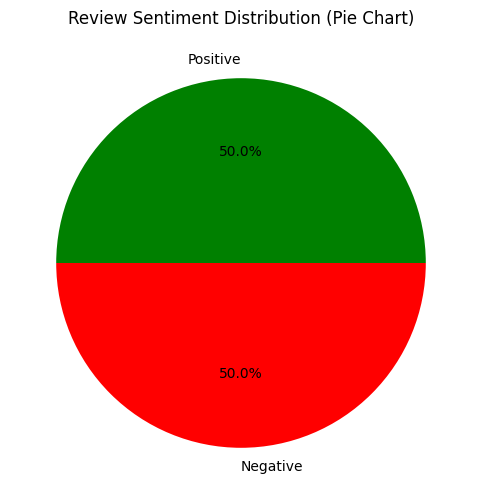

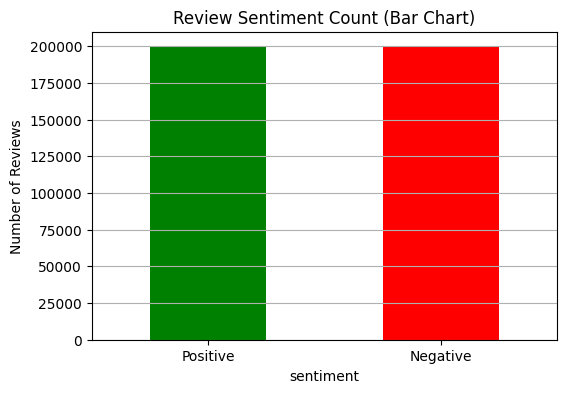

In [50]:
import matplotlib.pyplot as plt

# Count sentiment categories
sentiment_counts = df_cleaned['sentiment'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title("Review Sentiment Distribution (Pie Chart)")
plt.show()

# Plot Bar Chart
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Review Sentiment Count (Bar Chart)")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [51]:
# Optional: Show 1 example for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    example = df_cleaned[df_cleaned['sentiment'] == sentiment]
    if not example.empty:
        print(f"\n🔹 Example {sentiment} Review:")
        print("Title:", example.iloc[0]['title'])
        print("Text:", example.iloc[0]['reviewText'])


🔹 Example Positive Review:
Title: Great CD
Text: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"

🔹 Example Negative Review:
Title: Batteries died within a year ...
Text: I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year, the batteries would not hold a charge. Might as well just get alkaline disposables, or look elsewhere for a charger that comes with batteries that have better staying power.
